In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

print('library imported')
%matplotlib qt

MEASUREMENT_TIME = 3000
INTERVAL_SEC = 180

for i in range(MEASUREMENT_TIME):
    # replace with your data
    #https://docs.google.com/spreadsheets/d/1IEFPaOT6y0N92Vu1ItKzUhrDpizdPs9j6ooBm9iXh14/edit#gid=1364687813
    #https://docs.google.com/spreadsheets/d/1IEFPaOT6y0N92Vu1ItKzUhrDpizdPs9j6ooBm9iXh14/edit?usp=sharingimport pandas as pd
    sheet_id = '1IEFPaOT6y0N92Vu1ItKzUhrDpizdPs9j6ooBm9iXh14'
    xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
    data = pd.read_excel(xls,'9',header = 0)
    initiData=data['CO2'].iloc[0]
    referenceData = 429
    updateData = referenceData/initiData
    data["CO2"] = data["CO2"]*updateData

    dList =data.index.tolist()
    dataCol=data['CO2'].tolist()

    plt.plot(dList,dataCol)

    # figure appearence adjustments
    #plt.ylim(-0.2, 1.2)
    plt.title(f'FRAME {i+1}')

    # to avoid clearing last plot
    if (i != MEASUREMENT_TIME-1):
        plt.draw()
        plt.pause(INTERVAL_SEC)
        plt.cla()
    else:
        plt.show()
        


C:\Users\steve\AppData\Local\Temp\ipykernel_27908\1517362953.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)
C:\Users\steve\AppData\Local\Temp\ipykernel_27908\1517362953.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  updateData = referenceData/initiData


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 0.07110585763175246
Full Sill: 0.08709635335148819
Range: 25.181158840332397
Nugget: 0.015990495719735723 



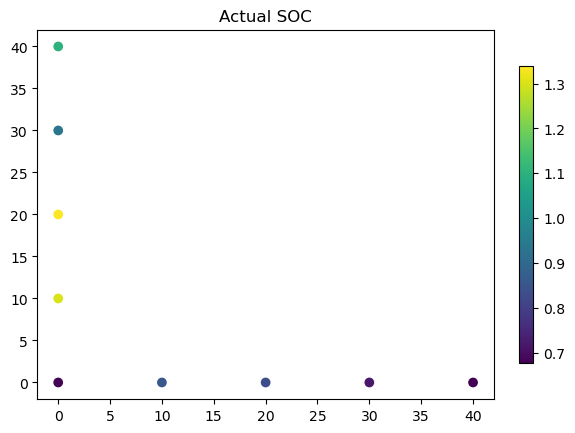

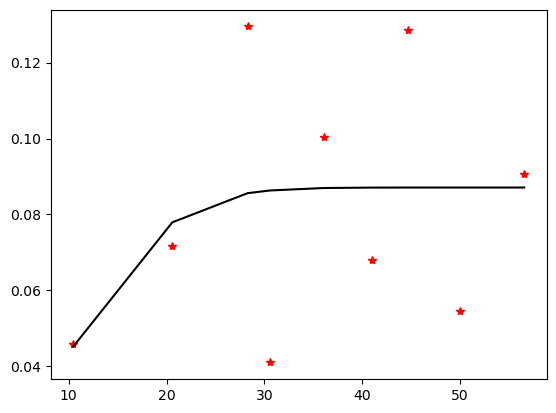

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 0.6448602438139194
Full Sill: 1.363787500031202
Range: 5.0
Nugget: 0.7189272562172827 



C:\Users\steve\AppData\Local\Temp\ipykernel_27908\1517362953.py:125: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent=(0, 50, 0, 50), origin='lower', vmin = 0);


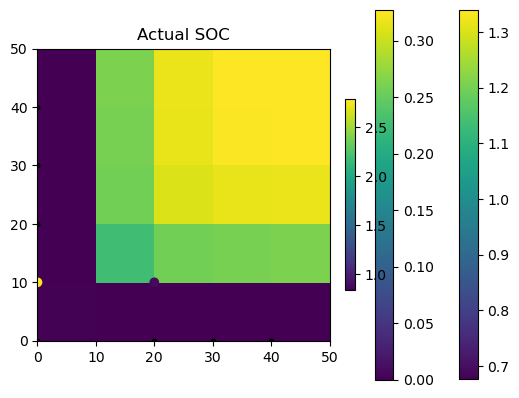

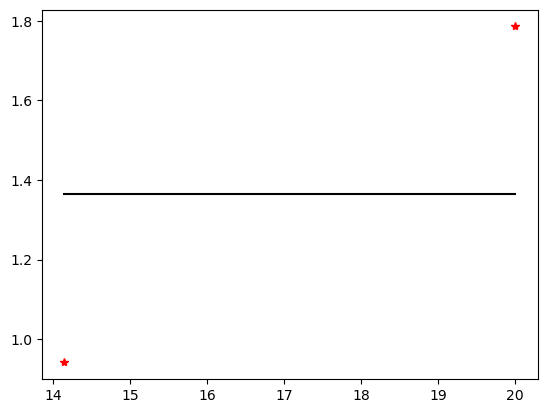

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

Using matplotlib backend: Qt5Agg


C:\Users\steve\AppData\Local\Temp\ipykernel_27908\1517362953.py:157: RuntimeWarning: invalid value encountered in sqrt
  caxz = plt.imshow(np.sqrt(ss), extent=(0, 30, 0, 10), origin='lower', vmin = 0);


Using matplotlib backend: Qt5Agg
Using matplotlib backend: Qt5Agg


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

dtf1 = pd.read_csv('/Users/steve/arkansas1.csv')
dtf2 = pd.read_csv('/Users/steve/arkansas2.csv')
X = dtf1.drop([], axis=1).dropna(how='all')
Y = dtf2
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42);

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10,random_state=42)
rf.fit(X_train, Y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, y_rf_test_pred)
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

sheets = ['1','2','3','4','5','6','7','8','9']
counterArray = 0
protoValue = []
t = [[0]*5 for i in range(5)]
for x in sheets:
    #https://docs.google.com/spreadsheets/d/1IEFPaOT6y0N92Vu1ItKzUhrDpizdPs9j6ooBm9iXh14/edit#gid=1364687813
    #https://docs.google.com/spreadsheets/d/1IEFPaOT6y0N92Vu1ItKzUhrDpizdPs9j6ooBm9iXh14/edit?usp=sharingimport pandas as pd
    sheet_id = '1IEFPaOT6y0N92Vu1ItKzUhrDpizdPs9j6ooBm9iXh14'
    xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
    data = pd.read_excel(xls,x,header = 0)
    dList =data.index.tolist()
    dataCol=data['CO2'].tolist()
    initiData=data['CO2'].iloc[0]
    referenceData = 429
    updateData = referenceData/initiData
    data["CO2"] = data["CO2"]*updateData

    startTemp = data['Temperature'].iloc[0]
    startMoist = data['Moisture'].iloc[0]
    tempAverage = data['Temperature'].mean()
    moistAverage = data['Moisture'].mean()
    tempChange = tempAverage-startTemp
    moistChange = moistAverage-startMoist
    depth = 15
    crop = 0
    harvest = 0
    slope_intercept = np.polyfit(dList,dataCol,1)
    slope =abs(slope_intercept[0])
    counter = 0
    steadyState = []
    for i in range(len(dataCol)-1):
        if((dataCol[i]*1.01)<dataCol[i+1]):
            ss = dataCol[i]
        else:
            ss = dataCol[i+1] 
        if(ss==dataCol[i]):
            counter = counter+1
            if(counter==2):
                steadyState.append(ss)
        else:
            counter = 0
    steadyState
    maxCO2SS = max(steadyState)
    minCO2SS = min(steadyState)
    PO = maxCO2SS-minCO2SS

    d = {'PO':[PO], 'Depth': [depth], 'Moist': [moistAverage], 'PO_Rate': [slope,], 'Crop': [crop]
         , 'Harvest': [harvest]}
    df = pd.DataFrame(data=d)
    y_rf_test_pred = rf.predict(df)
    #protoValue.insert(counterArray, y_rf_test_pred)
    protoValue.insert(counterArray,y_rf_test_pred.tolist())
    if(t[0][0]>0): 
        t[4-counterArray][0]=round(y_rf_test_pred[0],3)
    else:
         t[0][counterArray-4]=round(y_rf_test_pred[0],3)
    counterArray = counterArray + 1

measured=t
measured;

import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

x = np.array([0,0,0,0,0,10,20,30,40])
y = np.array([0,10,20,30,40,0,0,0,0])
phi = np.array([t[0][0],t[1][0],t[2][0],t[3][0],t[4][0],t[0][1],t[0][2],t[0][3],t[0][4]])

cax = plt.scatter(x, y, c=phi);
cbar = plt.colorbar(cax, fraction=0.03);
plt.title('Actual SOC');

OK = OrdinaryKriging(
    x, 
    y, 
    phi, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

gridx = np.arange(0, 50, 10, dtype='float64');
gridy = np.arange(0, 50, 10, dtype='float64');
zstar, ss = OK.execute("grid", gridx, gridy);

cax = plt.imshow(zstar, extent=(0, 50, 0, 50), origin='lower');
plt.scatter(x, y, c='k', marker='.');
cbar=plt.colorbar(cax);
plt.title('Estimated SOC');

cax = plt.imshow(np.sqrt(ss), extent=(0, 50, 0, 50), origin='lower', vmin = 0);
plt.scatter(x, y, c='k', marker='.');
cbar=plt.colorbar(cax);
plt.title('SOC standard devation');

xz = np.array([0,10,20]);
yz = np.array([10,0,10]);
phiz = np.array([2.78,0.84,0.89]);

caxz = plt.scatter(xz, yz, c=phiz);
cbarz = plt.colorbar(caxz, fraction=0.03);
plt.title('Actual SOC');

OK = OrdinaryKriging(
    xz, 
    yz, 
    phiz, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

gridxz = np.arange(0, 30, 10, dtype='float64');
gridyz = np.arange(0, 10, 10, dtype='float64');
zstarz, ssz = OK.execute("grid", gridxz, gridyz);

caxz = plt.imshow(zstarz, extent=(0, 30, 0, 10), origin='lower');
plt.scatter(xz, yz, c='k', marker='.');
cbar=plt.colorbar(caxz);
plt.title('Estimated SOC');

caxz = plt.imshow(np.sqrt(ss), extent=(0, 30, 0, 10), origin='lower', vmin = 0);
plt.scatter(xz, yz, c='k', marker='.');
cbar=plt.colorbar(caxz);
plt.title('SOC standard devation');

arkansas = [[0]*5 for i in range(5)]
nebraska = [[0]*5 for i in range(5)]
arkansas[0][0]=0.77
arkansas[0][1]=0.86
arkansas[0][2]=0.78
arkansas[0][3]=1.00
arkansas[0][4]=0.67
arkansas[1][0]=0.73
arkansas[1][1]=0.86
arkansas[1][2]=0.91
arkansas[1][3]=0.85
arkansas[1][4]=0.85
arkansas[2][0]=0.96
arkansas[2][1]=0.86
arkansas[2][2]=0.79
arkansas[2][3]=0.86
arkansas[2][4]=0.85
arkansas[3][0]=0.73
arkansas[3][1]=0.86
arkansas[3][2]=0.83
arkansas[3][3]=0.83
arkansas[3][4]=0.85
arkansas[4][0]=0.96
arkansas[4][1]=0.86
arkansas[4][2]=0.85
arkansas[4][3]=0.84
arkansas[4][4]=0.84

nebraska[0][0]=4.10
nebraska[0][1]=4.00
nebraska[0][2]=4.10
nebraska[0][3]=3.80
nebraska[0][4]=3.10
nebraska[1][0]=2.50
nebraska[1][1]=2.40
nebraska[1][2]=4.00
nebraska[1][3]=2.80
nebraska[1][4]=3.30
nebraska[2][0]=3.30
nebraska[2][1]=2.40
nebraska[2][2]=2.40
nebraska[2][3]=1.40
nebraska[2][4]=2.70
nebraska[3][0]=2.40
nebraska[3][1]=2.10
nebraska[3][2]=3.30
nebraska[3][3]=1.90
nebraska[3][4]=2.10
nebraska[4][0]=2.80
nebraska[4][1]=2.60
nebraska[4][2]=2.30
nebraska[4][3]=2.20
nebraska[4][4]=1.60

def indiana_Print():
    # Python program to generate a heatmap
    # which displays the value in each cell 
    # corresponding to the given dataframe 

    # import required libraries
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns  
    from matplotlib.colors import ListedColormap, BoundaryNorm


    fig, ax = plt.subplots(figsize = (12, 7))
    # defining index for the dataframe
    idx = ['1', '2', '3', '4','5']

    # defining columns for the dataframe
    cols = ['1', '2', '3', '4','5']

    # entering values in the index and columns  
    # and converting them into a panda dataframe
    #bounds = [0.6, 0.7, 0.8, 0.9, 0.1]


    df = pd.DataFrame(zstar.data,columns = cols, index = idx)


    df1 = round(df/2.44322779,2)


    df2 = round(df1/1.2,2)


    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    %matplotlib

    # importing required libraries
    from mpl_toolkits.mplot3d import Axes3D

    X = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    Y = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    Z = pd.DataFrame([[15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V1 = pd.DataFrame(zstar.data,
                    index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))

    fig = plt.figure(figsize=[15,10])
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(V1))
    tp1 = np.reshape(X, (25, 1))
    tp2 = np.reshape(Y, (25, 1))
    tp3 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
    tp4 = np.reshape(pd.DataFrame(V1).to_numpy(),(25,1))
    tp5 = np.concatenate((tp1, tp2, tp3, tp4), axis=1)
    tp6 = pd.DataFrame(tp5)
    tp6 = tp6.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})



    X2 = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    Y2 = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    Z2 = pd.DataFrame([[30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V2 = df1

    ax.plot_surface(X2, Y2, Z2, facecolors=plt.cm.jet(V2))
    tp7 = np.reshape(pd.DataFrame(Z2).to_numpy(),(25,1))
    tp8 = np.reshape(pd.DataFrame(V2).to_numpy(),(25,1))
    tp9 = np.concatenate((tp1, tp2, tp7, tp8), axis=1)
    tp10 = pd.DataFrame(tp9).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombine = pd.concat([tp6,tp10]) 


    X3 = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    Y3 = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    Z3 = pd.DataFrame([[45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V3 = df2

    # Plot
    ax.plot_surface(X3, Y3, Z3, facecolors=plt.cm.jet(V3))
    tp11 = np.reshape(pd.DataFrame(Z3).to_numpy(),(25,1))
    tp12 = np.reshape(pd.DataFrame(V3).to_numpy(),(25,1))
    tp13 = np.concatenate((tp1, tp2, tp11, tp12), axis=1)
    tp14 = pd.DataFrame(tp13).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombine = pd.concat([tpCombine,tp14]) 

    V4=(V1.values-V2.values)/15
    counter = 0;
    for x in range(15):
        counter = counter+1
        V5 = V4*(counter)
        V6 = V1-V5
        Z = Z+1
        ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(V6))
        tp15 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
        tp16 = np.reshape(pd.DataFrame(V6).to_numpy(),(25,1))
        tp17 = np.concatenate((tp1, tp2, tp15, tp16), axis=1)
        tp18 = pd.DataFrame(tp17).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
        tpCombine = pd.concat([tpCombine,tp18]) 
    counter =0    
    V7=(V2.values-V3.values)/15
    for x in range(15):
        counter = counter+1
        V8 = V7*(counter)
        V9 = V2-V8
        Z = Z+1
        ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(V9))
        tp19 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
        tp20 = np.reshape(pd.DataFrame(V9).to_numpy(),(25,1))
        tp21 = np.concatenate((tp1, tp2, tp19, tp20), axis=1)
        tp22 = pd.DataFrame(tp21).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
        tpCombine = pd.concat([tpCombine,tp22])



    ax.set_xlabel('x (m)', fontsize=18)
    ax.set_ylabel('y (m)', fontsize=18)
    ax.set_zlabel('z (cm)', fontsize=18)
    m3 = cm.ScalarMappable(cmap=cm.jet)
    m3.set_array(V1)
    plt.colorbar(m3)
    ax.invert_zaxis()
    ax.set_title("Indiana Field 3D Mapping", fontsize=18)
    tp1 = np.reshape(X, (25, 1))
    tp2 = np.reshape(Y, (25, 1))
    tp3 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
    tp4 = np.reshape(pd.DataFrame(V1).to_numpy(),(25,1))
    tp5 = np.concatenate((tp1, tp2, tp3, tp4), axis=1)
    tp6 = pd.DataFrame(tp5)
    tp7 = tp6.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    #tp7
    tpCombine;
def arkansas_Print():
    # Python program to generate a heatmap
    # which displays the value in each cell 
    # corresponding to the given dataframe 

    # import required libraries
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns  
    from matplotlib.colors import ListedColormap, BoundaryNorm
    figA, axA = plt.subplots(figsize = (12, 7))
    # defining index for the dataframe
    idxA = ['1', '2', '3', '4','5']

    # defining columns for the dataframe
    colsA = ['1', '2', '3', '4','5']

    # entering values in the index and columns  
    # and converting them into a panda dataframe
    #bounds = [0.6, 0.7, 0.8, 0.9, 0.1]


    dfA = pd.DataFrame(arkansas,columns = colsA, index = idxA)



    df1A = round(dfA/2.44322779,2)


    df2A = round(df1A/1.2,2)


    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    %matplotlib

    # importing required libraries
    from mpl_toolkits.mplot3d import Axes3D

    XA = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    YA = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    ZA = pd.DataFrame([[15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V1A = pd.DataFrame(arkansas,
                    index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))

    figA = plt.figure(figsize=[15,10])
    axA = figA.add_subplot(111, projection='3d')

    axA.plot_surface(XA, YA, ZA, facecolors=plt.cm.jet(V1A))
    tp1A = np.reshape(XA, (25, 1))
    tp2A = np.reshape(YA, (25, 1))
    tp3A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
    tp4A = np.reshape(pd.DataFrame(V1A).to_numpy(),(25,1))
    tp5A = np.concatenate((tp1A, tp2A, tp3A, tp4A), axis=1)
    tp6A = pd.DataFrame(tp5A)
    tp6A = tp6A.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})


    X2A = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    Y2A = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    Z2A = pd.DataFrame([[30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V2A = df1A

    axA.plot_surface(X2A, Y2, Z2A, facecolors=plt.cm.jet(V2A))
    tp7A = np.reshape(pd.DataFrame(Z2A).to_numpy(),(25,1))
    tp8A = np.reshape(pd.DataFrame(V2A).to_numpy(),(25,1))
    tp9A = np.concatenate((tp1A, tp2A, tp7A, tp8A), axis=1)
    tp10A = pd.DataFrame(tp9A).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineA = pd.concat([tp6A,tp10A]) 


    X3A = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    Y3A = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    Z3A = pd.DataFrame([[45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V3A = df2A

    # Plot
    axA.plot_surface(X3A, Y3A, Z3A, facecolors=plt.cm.jet(V3A))
    tp11A = np.reshape(pd.DataFrame(Z3A).to_numpy(),(25,1))
    tp12A = np.reshape(pd.DataFrame(V3A).to_numpy(),(25,1))
    tp13A = np.concatenate((tp1A, tp2A, tp11A, tp12A), axis=1)
    tp14A = pd.DataFrame(tp13).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineA = pd.concat([tpCombineA,tp14A]) 

    V4A=(V1A.values-V2A.values)/15
    counterA = 0;
    for x in range(15):
        counterA = counterA+1
        V5A = V4A*(counterA)
        V6A = V1A-V5A
        ZA = ZA+1
        axA.plot_surface(XA, YA, ZA, facecolors=plt.cm.jet(V6A))
        tp15A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
        tp16A = np.reshape(pd.DataFrame(V6A).to_numpy(),(25,1))
        tp17A = np.concatenate((tp1A, tp2A, tp15A, tp16A), axis=1)
        tp18A = pd.DataFrame(tp17A).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
        tpCombineA = pd.concat([tpCombineA,tp18A]) 
    counterA =0    
    V7A=(V2A.values-V3A.values)/15
    for x in range(15):
        counterA = counterA+1
        V8A = V7A*(counterA)
        V9A = V2A-V8A
        ZA = ZA+1
        axA.plot_surface(XA, YA, ZA, facecolors=plt.cm.jet(V9A))
        tp19A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
        tp20A = np.reshape(pd.DataFrame(V9A).to_numpy(),(25,1))
        tp21A = np.concatenate((tp1A, tp2A, tp19A, tp20A), axis=1)
        tp22A = pd.DataFrame(tp21A).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
        tpCombineA = pd.concat([tpCombineA,tp22A])



    axA.set_xlabel('x (m)', fontsize=18)
    axA.set_ylabel('y (m)', fontsize=18)
    axA.set_zlabel('z (cm)', fontsize=18)
    m3A = cm.ScalarMappable(cmap=cm.jet)
    m3A.set_array(V1A)
    plt.colorbar(m3A)
    axA.invert_zaxis()
    axA.set_title("Arkansas Field 3D Mapping", fontsize=18)
    tp1A = np.reshape(XA, (25, 1))
    tp2A = np.reshape(YA, (25, 1))
    tp3A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
    tp4A = np.reshape(pd.DataFrame(V1A).to_numpy(),(25,1))
    tp5A = np.concatenate((tp1A, tp2A, tp3A, tp4A), axis=1)
    tp6A = pd.DataFrame(tp5A)
    tp7A = tp6A.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})

    tpCombineA;
    
def nebraska_Print():
    # Python program to generate a heatmap
    # which displays the value in each cell 
    # corresponding to the given dataframe 

    # import required libraries
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns  
    from matplotlib.colors import ListedColormap, BoundaryNorm
    %matplotlib

    # importing required libraries
    from mpl_toolkits.mplot3d import Axes3D
    # defining index for the dataframe
    idxN = ['1', '2', '3', '4','5']

    # defining columns for the dataframe
    colsN = ['1', '2', '3', '4','5']

    # entering values in the index and columns  
    # and converting them into a panda dataframe
    #bounds = [0.6, 0.7, 0.8, 0.9, 0.1]


    dfN = pd.DataFrame(nebraska,columns = colsN, index = idxN)



    df1N = round(dfN/2.44322779,2)


    df2N = round(df1N/1.2,2)


    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    XN = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    YN = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    ZN = pd.DataFrame([[15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15],
                       [15, 15,15, 15, 15]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V1N = pd.DataFrame(nebraska,
                    index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))

    figN = plt.figure(figsize=[15,10])
    axN = figN.add_subplot(111, projection='3d')

    axN.plot_surface(XN, YN, ZN, facecolors=plt.cm.jet(V1N))
    tp1N = np.reshape(XN, (25, 1))
    tp2N = np.reshape(YN, (25, 1))
    tp3N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
    tp4N = np.reshape(pd.DataFrame(V1N).to_numpy(),(25,1))
    tp5N = np.concatenate((tp1N, tp2N, tp3N, tp4N), axis=1)
    tp6N = pd.DataFrame(tp5N)
    tp6N = tp6N.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})


    X2N = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    Y2N = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    Z2N = pd.DataFrame([[30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30],
                       [30, 30,30, 30, 30]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V2N = df1N

    axN.plot_surface(X2N, Y2N, Z2N, facecolors=plt.cm.jet(V2N))
    tp7N = np.reshape(pd.DataFrame(Z2N).to_numpy(),(25,1))
    tp8N = np.reshape(pd.DataFrame(V2N).to_numpy(),(25,1))
    tp9N = np.concatenate((tp1N, tp2N, tp7N, tp8N), axis=1)
    tp10N = pd.DataFrame(tp9N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineN = pd.concat([tp6N,tp10N]) 


    X3N = np.array([[ 10, 10, 10, 10, 10],
                  [ 20, 20, 20, 20, 20],
                  [ 30, 30, 30, 30, 30],
                  [ 40, 40, 40, 40, 40],
                  [ 50, 50, 50, 50, 50]])
    Y3N = np.array([[ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50],
                  [ 10, 20, 30, 40, 50]])
    Z3N = pd.DataFrame([[45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45],
                       [45, 45,45, 45, 45]],
                     index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
    V3N = df2N

    # Plot
    axN.plot_surface(X3N, Y3N, Z3N, facecolors=plt.cm.jet(V3N))
    tp11N = np.reshape(pd.DataFrame(Z3N).to_numpy(),(25,1))
    tp12N = np.reshape(pd.DataFrame(V3N).to_numpy(),(25,1))
    tp13N = np.concatenate((tp1N, tp2N, tp11N, tp12N), axis=1)
    tp14N = pd.DataFrame(tp13N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineN = pd.concat([tpCombineN,tp14N]) 

    V4N=(V1N.values-V2N.values)/15
    counterN = 0;
    for x in range(15):
        counterN = counterN+1
        V5N = V4N*(counterN)
        V6N = V1N-V5N
        ZN = ZN+1
        axN.plot_surface(XN, YN, ZN, facecolors=plt.cm.jet(V6N))
        tp15N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
        tp16N = np.reshape(pd.DataFrame(V6N).to_numpy(),(25,1))
        tp17N = np.concatenate((tp1N, tp2N, tp15N, tp16N), axis=1)
        tp18N = pd.DataFrame(tp17N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
        tpCombineN = pd.concat([tpCombineN,tp18N]) 
    counterN =0    
    V7N=(V2N.values-V3N.values)/15
    for x in range(15):
        counterN = counterN+1
        V8N = V7N*(counterN)
        V9N = V2N-V8N
        ZN = ZN+1
        axN.plot_surface(XN, YN, ZN, facecolors=plt.cm.jet(V9N))
        tp19N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
        tp20N = np.reshape(pd.DataFrame(V9N).to_numpy(),(25,1))
        tp21N = np.concatenate((tp1N, tp2N, tp19N, tp20N), axis=1)
        tp22N = pd.DataFrame(tp21N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
        tpCombineN = pd.concat([tpCombineN,tp22N])



    axN.set_xlabel('x (m)', fontsize=18)
    axN.set_ylabel('y (m)', fontsize=18)
    axN.set_zlabel('z (cm)', fontsize=18)
    m3N = cm.ScalarMappable(cmap=cm.jet)
    m3N.set_array(V1N)
    plt.colorbar(m3N)
    axN.invert_zaxis()
    axN.set_title("Nebraska Field 3D Mapping", fontsize=18)
    tp1N = np.reshape(XA, (25, 1))
    tp2N = np.reshape(YA, (25, 1))
    tp3N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
    tp4N = np.reshape(pd.DataFrame(V1N).to_numpy(),(25,1))
    tp5N = np.concatenate((tp1N, tp2N, tp3N, tp4N), axis=1)
    tpN = pd.DataFrame(tp5N)
    tpN = tp6N.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'});

    tpCombineN;
    
# Python program to generate a heatmap
# which displays the value in each cell 
# corresponding to the given dataframe 

# import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  
from matplotlib.colors import ListedColormap, BoundaryNorm


fig, ax = plt.subplots(figsize = (12, 7))
# defining index for the dataframe
idx = ['1', '2', '3', '4','5']

# defining columns for the dataframe
cols = ['1', '2', '3', '4','5']

# entering values in the index and columns  
# and converting them into a panda dataframe
#bounds = [0.6, 0.7, 0.8, 0.9, 0.1]


df = pd.DataFrame(zstar.data,columns = cols, index = idx)


df1 = round(df/2.44322779,2)


df2 = round(df1/1.2,2)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

X = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
Y = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
Z = pd.DataFrame([[15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V1 = pd.DataFrame(zstar.data,
                index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))

fig = plt.figure(figsize=[15,10]);
ax = fig.add_subplot(111, projection='3d');

ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(V1))
tp1 = np.reshape(X, (25, 1))
tp2 = np.reshape(Y, (25, 1))
tp3 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
tp4 = np.reshape(pd.DataFrame(V1).to_numpy(),(25,1))
tp5 = np.concatenate((tp1, tp2, tp3, tp4), axis=1)
tp6 = pd.DataFrame(tp5)
tp6 = tp6.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})



X2 = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
Y2 = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
Z2 = pd.DataFrame([[30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V2 = df1

ax.plot_surface(X2, Y2, Z2, facecolors=plt.cm.jet(V2))
tp7 = np.reshape(pd.DataFrame(Z2).to_numpy(),(25,1))
tp8 = np.reshape(pd.DataFrame(V2).to_numpy(),(25,1))
tp9 = np.concatenate((tp1, tp2, tp7, tp8), axis=1)
tp10 = pd.DataFrame(tp9).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
tpCombine = pd.concat([tp6,tp10]) 


X3 = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
Y3 = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
Z3 = pd.DataFrame([[45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V3 = df2

# Plot
ax.plot_surface(X3, Y3, Z3, facecolors=plt.cm.jet(V3))
tp11 = np.reshape(pd.DataFrame(Z3).to_numpy(),(25,1))
tp12 = np.reshape(pd.DataFrame(V3).to_numpy(),(25,1))
tp13 = np.concatenate((tp1, tp2, tp11, tp12), axis=1)
tp14 = pd.DataFrame(tp13).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
tpCombine = pd.concat([tpCombine,tp14]) 

V4=(V1.values-V2.values)/15
counter = 0;
for x in range(15):
    counter = counter+1
    V5 = V4*(counter)
    V6 = V1-V5
    Z = Z+1
    ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(V6))
    tp15 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
    tp16 = np.reshape(pd.DataFrame(V6).to_numpy(),(25,1))
    tp17 = np.concatenate((tp1, tp2, tp15, tp16), axis=1)
    tp18 = pd.DataFrame(tp17).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombine = pd.concat([tpCombine,tp18]) 
counter =0    
V7=(V2.values-V3.values)/15
for x in range(15):
    counter = counter+1
    V8 = V7*(counter)
    V9 = V2-V8
    Z = Z+1
    ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(V9))
    tp19 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
    tp20 = np.reshape(pd.DataFrame(V9).to_numpy(),(25,1))
    tp21 = np.concatenate((tp1, tp2, tp19, tp20), axis=1)
    tp22 = pd.DataFrame(tp21).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombine = pd.concat([tpCombine,tp22])



ax.set_xlabel('x (m)', fontsize=18)
ax.set_ylabel('y (m)', fontsize=18)
ax.set_zlabel('z (cm)', fontsize=18)
m3 = cm.ScalarMappable(cmap=cm.jet)
m3.set_array(V1)
plt.colorbar(m3)
ax.invert_zaxis()
ax.set_title("Indiana Field 3D Mapping", fontsize=18)
tp1 = np.reshape(X, (25, 1))
tp2 = np.reshape(Y, (25, 1))
tp3 = np.reshape(pd.DataFrame(Z).to_numpy(),(25,1))
tp4 = np.reshape(pd.DataFrame(V1).to_numpy(),(25,1))
tp5 = np.concatenate((tp1, tp2, tp3, tp4), axis=1)
tp6 = pd.DataFrame(tp5)
tp7 = tp6.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
#tp7
tpCombine;

# Python program to generate a heatmap
# which displays the value in each cell 
# corresponding to the given dataframe 

# import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  
from matplotlib.colors import ListedColormap, BoundaryNorm
figA, axA = plt.subplots(figsize = (12, 7))
# defining index for the dataframe
idxA = ['1', '2', '3', '4','5']

# defining columns for the dataframe
colsA = ['1', '2', '3', '4','5']

# entering values in the index and columns  
# and converting them into a panda dataframe
#bounds = [0.6, 0.7, 0.8, 0.9, 0.1]


dfA = pd.DataFrame(arkansas,columns = colsA, index = idxA)



df1A = round(dfA/2.44322779,2)


df2A = round(df1A/1.2,2)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

XA = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
YA = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
ZA = pd.DataFrame([[15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V1A = pd.DataFrame(arkansas,
                index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))

figA = plt.figure(figsize=[15,10]);
axA = figA.add_subplot(111, projection='3d');

axA.plot_surface(XA, YA, ZA, facecolors=plt.cm.jet(V1A))
tp1A = np.reshape(XA, (25, 1))
tp2A = np.reshape(YA, (25, 1))
tp3A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
tp4A = np.reshape(pd.DataFrame(V1A).to_numpy(),(25,1))
tp5A = np.concatenate((tp1A, tp2A, tp3A, tp4A), axis=1)
tp6A = pd.DataFrame(tp5A)
tp6A = tp6A.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})


X2A = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
Y2A = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
Z2A = pd.DataFrame([[30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V2A = df1A

axA.plot_surface(X2A, Y2, Z2A, facecolors=plt.cm.jet(V2A))
tp7A = np.reshape(pd.DataFrame(Z2A).to_numpy(),(25,1))
tp8A = np.reshape(pd.DataFrame(V2A).to_numpy(),(25,1))
tp9A = np.concatenate((tp1A, tp2A, tp7A, tp8A), axis=1)
tp10A = pd.DataFrame(tp9A).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
tpCombineA = pd.concat([tp6A,tp10A]) 


X3A = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
Y3A = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
Z3A = pd.DataFrame([[45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V3A = df2A

# Plot
axA.plot_surface(X3A, Y3A, Z3A, facecolors=plt.cm.jet(V3A))
tp11A = np.reshape(pd.DataFrame(Z3A).to_numpy(),(25,1))
tp12A = np.reshape(pd.DataFrame(V3A).to_numpy(),(25,1))
tp13A = np.concatenate((tp1A, tp2A, tp11A, tp12A), axis=1)
tp14A = pd.DataFrame(tp13).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
tpCombineA = pd.concat([tpCombineA,tp14A]) 

V4A=(V1A.values-V2A.values)/15
counterA = 0;
for x in range(15):
    counterA = counterA+1
    V5A = V4A*(counterA)
    V6A = V1A-V5A
    ZA = ZA+1
    axA.plot_surface(XA, YA, ZA, facecolors=plt.cm.jet(V6A))
    tp15A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
    tp16A = np.reshape(pd.DataFrame(V6A).to_numpy(),(25,1))
    tp17A = np.concatenate((tp1A, tp2A, tp15A, tp16A), axis=1)
    tp18A = pd.DataFrame(tp17A).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineA = pd.concat([tpCombineA,tp18A]) 
counterA =0    
V7A=(V2A.values-V3A.values)/15
for x in range(15):
    counterA = counterA+1
    V8A = V7A*(counterA)
    V9A = V2A-V8A
    ZA = ZA+1
    axA.plot_surface(XA, YA, ZA, facecolors=plt.cm.jet(V9A))
    tp19A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
    tp20A = np.reshape(pd.DataFrame(V9A).to_numpy(),(25,1))
    tp21A = np.concatenate((tp1A, tp2A, tp19A, tp20A), axis=1)
    tp22A = pd.DataFrame(tp21A).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineA = pd.concat([tpCombineA,tp22A])



axA.set_xlabel('x (m)', fontsize=18)
axA.set_ylabel('y (m)', fontsize=18)
axA.set_zlabel('z (cm)', fontsize=18)
m3A = cm.ScalarMappable(cmap=cm.jet)
m3A.set_array(V1A)
plt.colorbar(m3A)
axA.invert_zaxis()
axA.set_title("Arkansas Field 3D Mapping", fontsize=18)
tp1A = np.reshape(XA, (25, 1))
tp2A = np.reshape(YA, (25, 1))
tp3A = np.reshape(pd.DataFrame(ZA).to_numpy(),(25,1))
tp4A = np.reshape(pd.DataFrame(V1A).to_numpy(),(25,1))
tp5A = np.concatenate((tp1A, tp2A, tp3A, tp4A), axis=1)
tp6A = pd.DataFrame(tp5A)
tp7A = tp6A.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})

tpCombineA;


# Python program to generate a heatmap
# which displays the value in each cell 
# corresponding to the given dataframe 

# import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
# defining index for the dataframe
idxN = ['1', '2', '3', '4','5']

# defining columns for the dataframe
colsN = ['1', '2', '3', '4','5']

# entering values in the index and columns  
# and converting them into a panda dataframe
#bounds = [0.6, 0.7, 0.8, 0.9, 0.1]


dfN = pd.DataFrame(nebraska,columns = colsN, index = idxN)



df1N = round(dfN/2.44322779,2)


df2N = round(df1N/1.2,2)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

XN = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
YN = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
ZN = pd.DataFrame([[15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15],
                   [15, 15,15, 15, 15]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V1N = pd.DataFrame(nebraska,
                index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))

figN = plt.figure(figsize=[15,10]);
axN = figN.add_subplot(111, projection='3d');

axN.plot_surface(XN, YN, ZN, facecolors=plt.cm.jet(V1N))
tp1N = np.reshape(XN, (25, 1))
tp2N = np.reshape(YN, (25, 1))
tp3N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
tp4N = np.reshape(pd.DataFrame(V1N).to_numpy(),(25,1))
tp5N = np.concatenate((tp1N, tp2N, tp3N, tp4N), axis=1)
tp6N = pd.DataFrame(tp5N)
tp6N = tp6N.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})


X2N = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
Y2N = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
Z2N = pd.DataFrame([[30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30],
                   [30, 30,30, 30, 30]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V2N = df1N

axN.plot_surface(X2N, Y2N, Z2N, facecolors=plt.cm.jet(V2N))
tp7N = np.reshape(pd.DataFrame(Z2N).to_numpy(),(25,1))
tp8N = np.reshape(pd.DataFrame(V2N).to_numpy(),(25,1))
tp9N = np.concatenate((tp1N, tp2N, tp7N, tp8N), axis=1)
tp10N = pd.DataFrame(tp9N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
tpCombineN = pd.concat([tp6N,tp10N]) 


X3N = np.array([[ 10, 10, 10, 10, 10],
              [ 20, 20, 20, 20, 20],
              [ 30, 30, 30, 30, 30],
              [ 40, 40, 40, 40, 40],
              [ 50, 50, 50, 50, 50]])
Y3N = np.array([[ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50],
              [ 10, 20, 30, 40, 50]])
Z3N = pd.DataFrame([[45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45],
                   [45, 45,45, 45, 45]],
                 index=np.arange(1, 6, 1), columns=np.arange(1, 6, 1))
V3N = df2N

# Plot
axN.plot_surface(X3N, Y3N, Z3N, facecolors=plt.cm.jet(V3N))
tp11N = np.reshape(pd.DataFrame(Z3N).to_numpy(),(25,1))
tp12N = np.reshape(pd.DataFrame(V3N).to_numpy(),(25,1))
tp13N = np.concatenate((tp1N, tp2N, tp11N, tp12N), axis=1)
tp14N = pd.DataFrame(tp13N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
tpCombineN = pd.concat([tpCombineN,tp14N]) 

V4N=(V1N.values-V2N.values)/15
counterN = 0;
for x in range(15):
    counterN = counterN+1
    V5N = V4N*(counterN)
    V6N = V1N-V5N
    ZN = ZN+1
    axN.plot_surface(XN, YN, ZN, facecolors=plt.cm.jet(V6N))
    tp15N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
    tp16N = np.reshape(pd.DataFrame(V6N).to_numpy(),(25,1))
    tp17N = np.concatenate((tp1N, tp2N, tp15N, tp16N), axis=1)
    tp18N = pd.DataFrame(tp17N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineN = pd.concat([tpCombineN,tp18N]) 
counterN =0    
V7N=(V2N.values-V3N.values)/15
for x in range(15):
    counterN = counterN+1
    V8N = V7N*(counterN)
    V9N = V2N-V8N
    ZN = ZN+1
    axN.plot_surface(XN, YN, ZN, facecolors=plt.cm.jet(V9N))
    tp19N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
    tp20N = np.reshape(pd.DataFrame(V9N).to_numpy(),(25,1))
    tp21N = np.concatenate((tp1N, tp2N, tp19N, tp20N), axis=1)
    tp22N = pd.DataFrame(tp21N).rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'})
    tpCombineN = pd.concat([tpCombineN,tp22N])



axN.set_xlabel('x (m)', fontsize=18)
axN.set_ylabel('y (m)', fontsize=18)
axN.set_zlabel('z (cm)', fontsize=18)
m3N = cm.ScalarMappable(cmap=cm.jet)
m3N.set_array(V1N)
plt.colorbar(m3N)
axN.invert_zaxis()
axN.set_title("Nebraska Field 3D Mapping", fontsize=18)
tp1N = np.reshape(XA, (25, 1))
tp2N = np.reshape(YA, (25, 1))
tp3N = np.reshape(pd.DataFrame(ZN).to_numpy(),(25,1))
tp4N = np.reshape(pd.DataFrame(V1N).to_numpy(),(25,1))
tp5N = np.concatenate((tp1N, tp2N, tp3N, tp4N), axis=1)
tpN = pd.DataFrame(tp5N)
tpN = tp6N.rename(columns={0:'X', 1:'Y', 2:'Z', 3:'Value'});

tpCombineN;


In [3]:
from IPython.display import display, clear_output
from ipyleaflet import Map, basemaps, basemap_to_tiles, Heatmap, Marker,TileLayer, LayersControl,Popup,WidgetControl,ImageOverlay,Polygon
from random import uniform
from ipywidgets import HTML
from PIL import Image
import ipywidgets as widgets


# https://medium.com/swlh/how-to-use-mouse-events-on-ipyleaflet-4d002097efc0
import contextlib
%matplotlib
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
#with contextlib.suppress(Exception):
buttonP = widgets.Button(description="XY-Plane SOC%")
button = widgets.Button(description="Localized SOC%")
buttonC = widgets.Button(description="Z-Crossection SOC%")
buttonA = widgets.Button(description="Average SOC%")
text1 = widgets.IntText(description="X")
text2 = widgets.IntText(description="Y")
text3 = widgets.IntText(description="Z")
buttonSub = widgets.Button(description="Submit")



tLoc=widgets.Dropdown(
    options=['Arkansas', 'Nebraska', 'Indiana'],
    description='Location:',
    disabled=False)

layout = widgets.Layout(display='flex',
         flex_flow='row',
         #border='solid',
         width='100%')

valueN = 0
dataSOC = tpCombine

def average_button_clicked(b):
    global valueN
    clear_output()
    display(tLoc)
    hi = widgets.Box(children=[buttonSub], layout=layout)
    display(hi)
    valueN = 1

def local_button_clicked(b):
    global valueN
    clear_output()
    hi = widgets.Box(children=[text1,text2,text3,buttonSub], layout=layout)
    display(tLoc)
    display(hi)
    valueN = 2
    
def xy_button_clicked(b):
    global valueN
    clear_output()
    hi = widgets.Box(children=[text3,buttonSub], layout=layout)
    display(tLoc)
    display(hi)
    valueN = 3

    
def z_button_clicked(b):
    global valueN
    clear_output()
    hi = widgets.Box(children=[text1,text2,buttonSub], layout=layout)
    display(tLoc)
    display(hi)
    valueN = 4
    
def submit(s):
    global valueN
    global dataSOC
    if(tLoc.value=="Arkansas"):
        dataSOC = tpCombineA
    if(tLoc.value=="Nebraska"):
        dataSOC = tpCombineN
    if(tLoc.value=="Indiana"):
        dataSOC = tpCombine
    if(valueN==1):
        averageSOC = round(dataSOC["Value"].mean(),2)
        clear_output()
        print("SOC% Value: ",averageSOC)
        display(dis)
        display(m)
        valueN = 0
    if(valueN==2):
        x= text1.value
        y= text2.value
        z= text3.value
        if(x<10):
            x=10       
        if(y<10):
            y=10  
        if(z<15):
            z=15
        clear_output()
        print("SOC% Value: ",round(dataSOC.loc[(tpCombine['X'] == x) & (dataSOC['Y'] == y) & (dataSOC['Z'] == z), 'Value'].iloc[0],2))
        display(dis)
        display(m)
        valueN = 0
    if(valueN==3):
        z= text3.value
        if(z<15):
            z=15
        clear_output()
        print("SOC% Value: ",round(dataSOC.loc[(dataSOC['Z'] == z), 'Value'].mean(),2))
        display(dis)
        display(m)
        valueN = 0
    if(valueN==4):
        x1= text1.value
        y1= text2.value
        if(x1<10):
            x1=10       
        if(y1<10):
            y1=10
        clear_output()
        locationBasedSOC = dataSOC[(dataSOC['X'] == x1)&(dataSOC['Y'] == y1)]
        locationBasedSOC.sort_values(by = 'Z')
        locationBasedSOCShaped = locationBasedSOC.drop(['X','Y'], axis=1)
        locationBasedSOCShaped = locationBasedSOCShaped.rename(columns={"Z":'Depth (cm)', "Value":'SOC (%)'})
        locationBasedSOCShaped = locationBasedSOCShaped.iloc[:-1]
        SOCPlot = locationBasedSOCShaped.sort_values(by = 'Depth (cm)').plot(x ='Depth (cm)', y='SOC (%)', kind = 'barh',title = "Location SOC Depth at " + str(x1) + " m " + "by " + str(y1) + " m").invert_yaxis()
        display(dis)
        display(m)
        valueN = 0
        
buttonA.on_click(average_button_clicked)
button.on_click(local_button_clicked)
buttonP.on_click(xy_button_clicked)
buttonC.on_click(z_button_clicked)
buttonSub.on_click(submit)
dis = widgets.Box(children=[buttonA,button,buttonP,buttonC], layout=layout)
display(dis)

m = Map(center=(40.5574, -92.286), basemap=basemaps.Esri.WorldImagery,
    zoom=4,dragging=True)
locations = [(34.4125, -91.675), (41.13505, -96.52079), (41.2903,-86.8922)]
locN = ["Arkansas", "Nebraska", "Indiana"]
avgSOC = ["0.84", "2.78", "0.89"]
temp = ["28.07", "25.56", "18.33"]
moist = ["65.68", "75.39", "67.59"]
img = ["arkansas.jpg", "nebraska.jpg", "indiana.jpg"]

#def handle_click(**kwargs):
#    print('\r'+str(kwargs['coordinates'])+"      ", end="")


couterclick =0

def handle_click(**kwargs):
    global couterclick
    if(couterclick==0):
        m.zoom = 17
        m.center = kwargs['coordinates']
        if(kwargs['coordinates']== [34.4125, -91.675]):
            #imgOpen = Image.open("arkansas.jpg")
            #display(imgOpen)
            arkansas_Print()
            clear_output()
            display(dis)
            display(m)
            
        if(kwargs['coordinates']== [41.13505, -96.52079]):
            #imgOpen = Image.open("nebraska.jpg")
            #display(imgOpen)
            nebraska_Print()
            clear_output()
            display(dis)
            display(m)
        if(kwargs['coordinates']== [41.2903,-86.8922]):
            #imgOpen = Image.open("indiana.jpg")
            #display(imgOpen)
            indiana_Print()
            clear_output()
            display(dis)
            display(m)
        couterclick = couterclick+1
    else:
        m.zoom = 4
        m.center = (40.5574, -92.286)
        couterclick = 0       
    

for i in range(len(locations)):
    new_marker_loc = (locations[i][0], locations[i][1])
    new_marker = Marker(location=new_marker_loc, draggable=False,title=locN[i]) 
    new_marker.on_click(handle_click)
    html = "<b>"+locN[i]+"</b>"+" <br>Average SOC%: "+ avgSOC[i]+"%"+"<br>Temperature: "+temp[i]+" C"+"<br>Moisture: "+moist[i]+"%"

   
    message = HTML()
    message.value = "<b>"+locN[i]+"</b>"+" <br>Average SOC%: "+ avgSOC[i]+"%"+"<br>Temperature: "+temp[i]+" C"+"<br>Moisture: "+moist[i]+"%"
    popup = Popup(
        location=(locations[i][0]+0.00009*-2, locations[i][1]+0.0001*-1),
        close_button=False,
        auto_close=False,
        close_on_escape_key=False,
        max_height=50
    )
    new_marker.popup = message
    m.add_layer(new_marker)
    image = ImageOverlay(
    url=img[i],
    #bounds=((13, -130), (32, -100)))
    bounds=((locations[i][0]+0.00009*-12, locations[i][1]+0.0001*12), (locations[i][0]++0.00009*12, locations[i][1]+0.0001*52))
    )
    #m.add_layer(image)



heatmap1 = Heatmap(
    locations=[(34.4125, -91.6749, 77),(34.4125, -91.6748, 73),(34.4125, -91.6747, 96),(34.4125, -91.6746, 73),(34.4125, -91.6745, 96),
              (34.41259, -91.6749, 86),(34.41259, -91.6748, 86),(34.41259, -91.6747, 86),(34.41259, -91.6746, 86),(34.41259, -91.6745, 86),
              (34.41268, -91.6749, 78),(34.41268, -91.6748, 91),(34.41268, -91.6747, 79),(34.41268, -91.6746, 83),(34.41268, -91.6745, 85),
              (34.41277, -91.6749, 100),(34.41277, -91.6748, 85),(34.41277, -91.6747, 86),(34.41277, -91.6746, 83),(34.41277, -91.6745, 84),
              (34.41286, -91.6749, 67),(34.41286, -91.6748, 85),(34.41286, -91.6747, 85),(34.41286, -91.6746, 85),(34.41286, -91.6745, 84)],
    radius=10,blur = 15
)

heatmap2 = Heatmap(
    locations=[(41.13505, -96.52076, 410),(41.13505, -96.52065, 250),(41.13505, -96.52054, 330),(41.13505, -96.52043, 240),(41.13505, -96.52032, 280),
              (41.13514, -96.52076, 400),(41.13514, -96.52065, 240),(41.13514, -96.52054, 240),(41.13514, -96.52043, 210),(41.13514, -96.52032, 260),
              (41.13523, -96.52076, 410),(41.13523, -96.52065, 400),(41.13523, -96.52054, 240),(41.13523, -96.52043, 330),(41.13523, -96.52032, 230),
              (41.13532, -96.52076, 380),(41.13532, -96.52065, 280),(41.13532, -96.52054, 140),(41.13532, -96.52043, 190),(41.13532, -96.52032, 220),
              (41.13541, -96.52076, 310),(41.13541, -96.52065, 330),(41.13541, -96.52054, 270),(41.13541, -96.52043, 210),(41.13541, -96.52032, 160)],
    radius=10,blur = 15
)

heatmap3 = Heatmap(
    locations=[(41.2903,-86.8922,zstar.data[0][0]*100),(41.2903,-86.8921,zstar.data[0][1]*100),(41.2903,-86.8920,zstar.data[0][2]*100),(41.2903,-86.8919,zstar.data[0][3]*100),(41.2903,-86.8917,zstar.data[0][4]*100),
                (41.29039,-86.8922,zstar.data[1][0]*100),(41.29039,-86.8921,zstar.data[1][1]*100),(41.29039,-86.8920,zstar.data[1][2]*100),(41.29039,-86.8919,zstar.data[1][3]*100),(41.29039,-86.8918,zstar.data[1][4]*100),
                (41.29048,-86.8922,zstar.data[2][0]*100),(41.29048,-86.8921,zstar.data[2][1]*100),(41.29048,-86.8920,zstar.data[2][2]*100),(41.29048,-86.8919,zstar.data[2][3]*100),(41.29048,-86.8918,zstar.data[2][4]*100),
                (41.29057,-86.8922,zstar.data[3][0]*100),(41.29057,-86.8921,zstar.data[3][1]*100),(41.29057,-86.8920,zstar.data[3][2]*100),(41.29057,-86.8919,zstar.data[3][3]*100),(41.29057,-86.8918,zstar.data[3][4]*100),
                (41.29066,-86.8922,zstar.data[4][0]*100),(41.29066,-86.8921,zstar.data[4][1]*100),(41.29066,-86.8920,zstar.data[4][2]*100),(41.29066,-86.8919,zstar.data[4][3]*100),(41.29066,-86.8918,zstar.data[4][4]*100)],
    radius=10,blur = 15
)

polygon = Polygon(
    locations=[(34.4125, -91.675), (41.13505, -96.52079), (41.2903,-86.8922)],
    color="black",
    fill_color="red"
)
message3 = HTML()
message3.value = "SOC% Value: "+str(round(zstarz.data.mean(),3))
polygon.popup = message3
m.add_layer(polygon);




m.add_layer(heatmap1);
m.add_layer(heatmap2);
m.add_layer(heatmap3);
btn=widgets.Button(description="Arkansas")
m.add_layer(btn);
display(m)



SOC% Value:  0.45


Box(children=(Button(description='Average SOC%', style=ButtonStyle()), Button(description='Localized SOC%', st…

Map(bottom=1742.0, center=[40.5574, -92.286], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…